### Exercise 1
• study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assume the following priors:
- a uniform distribution
- a Jeffrey’s prior
- a step function

• plot the posterior distribution and summerize the results computing the first two moments
• compute a 95% credibility interval and give the results in a summary table
• draw the limits on the plot of the posterior distribution

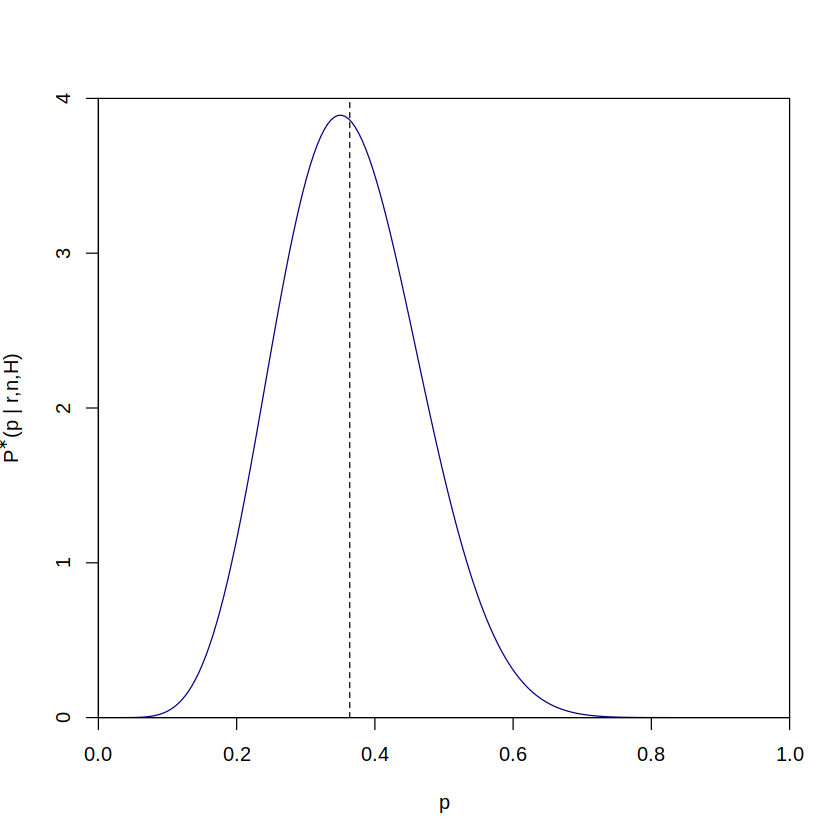

In [16]:
#uniform distribution
n <- 20
r <- 7
n.sample <-200
delta.p <- 1/n.sample
p <- seq(0, 1, length.out = n.sample)
prior.unif <- dbinom (x=r, size=n, prob=p)  # x is a vector of numbers.
                                                                            # size is the number of trials (20)
                                                                            # prob : the probability of success of each trial (uniform)

prior.unif.norm <- prior.unif /( delta.p*sum(prior.unif )) #normalization

p.unif.mean <- delta.p*sum(p*prior.unif.norm) #compute firs moment
p.unif.var <- delta.p*sum(p*p*prior.unif.norm)-p.unif.mean**2 #compute second moment

#Plot
plot(p, prior.unif.norm , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1,
ylim=c(0,4),
xlab="p",
ylab= expression(paste(P^symbol("*"), "(p | r,n,H)")))
abline (v=p.unif.mean , lty=2)

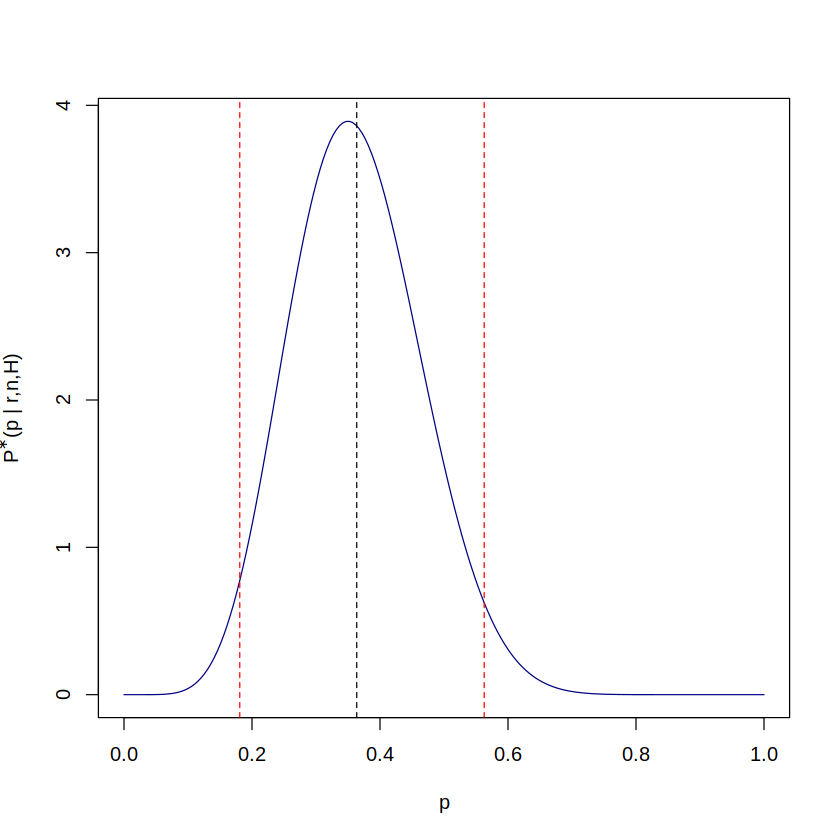

In [14]:
# Compute cumulative sum of posterior density
cum_prior <- cumsum(prior.unif.norm * delta.p)

# Find values enclosing 0.95 probability mass
lower_bound <- min(p[cum_prior >= 0.025])
upper_bound <- max(p[cum_prior <= 0.975])

# Plot posterior density and credibility interval
plot(p, prior.unif.norm, type = "l", xlab = "p", col='navy',lwd = 1,
     ylab = expression(paste(P^symbol("*"), "(p | r,n,H)")))
abline(v = p.unif.mean, lty = 2)
abline(v = lower_bound, col = "red", lty = 2)
abline(v = upper_bound, col = "red", lty = 2)

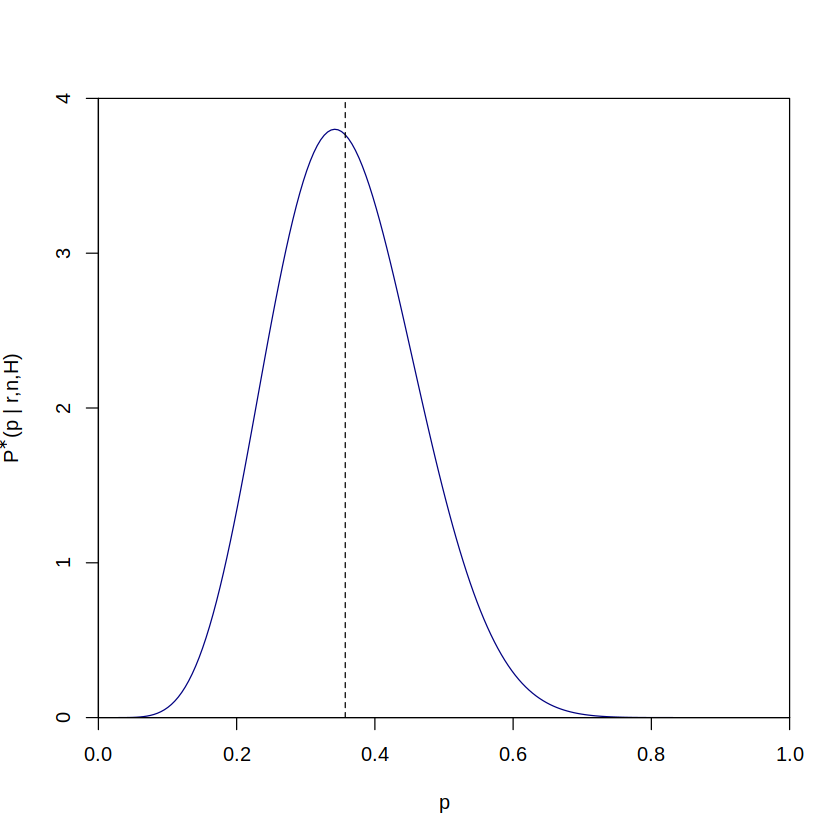

In [44]:
#Jeffrey’s prior
n <- 20
r <- 7
alpha_p <-1/2
beta_p <- 1/2
alpha <- alpha_p +r
beta <- beta_p+ n -r
p <- seq(0, 1, length.out = 200)
post.jeff <- dbeta(p, alpha , beta)

p.jeff.mean <- alpha /( alpha + beta)
p.jeff.var <- (alpha /( alpha + beta)**2)*(beta+n-r)/(alpha+beta+n+1)

plot(p, post.jeff , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1,
ylim=c(0,4),
xlab="p",
ylab= expression(paste(P^symbol("*"), "(p | r,n,H)")))
abline (v=p.jeff.mean , lty=2)

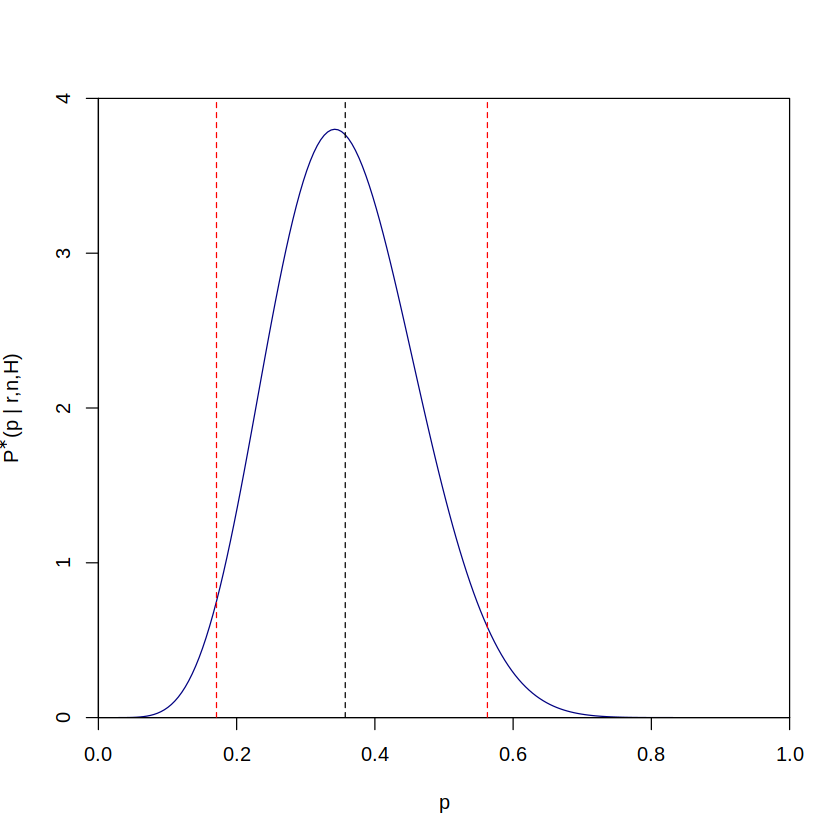

In [17]:
# Compute cumulative distribution function
cum.post <- cumsum(post.jeff)/sum(post.jeff)

# Find upper and lower bounds for 95% CI
lower <- min(p[cum.post >= 0.025])
upper <- max(p[cum.post <= 0.975])

# Plot posterior and CI
plot(p, post.jeff, xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd=1,
     ylim=c(0, 4),
     xlab="p",
     ylab=expression(paste(P^symbol("*"), "(p | r,n,H)")))
abline(v=p.jeff.mean, lty=2)
abline(v=lower, lty=2, col="red")
abline(v=upper, lty=2, col="red")

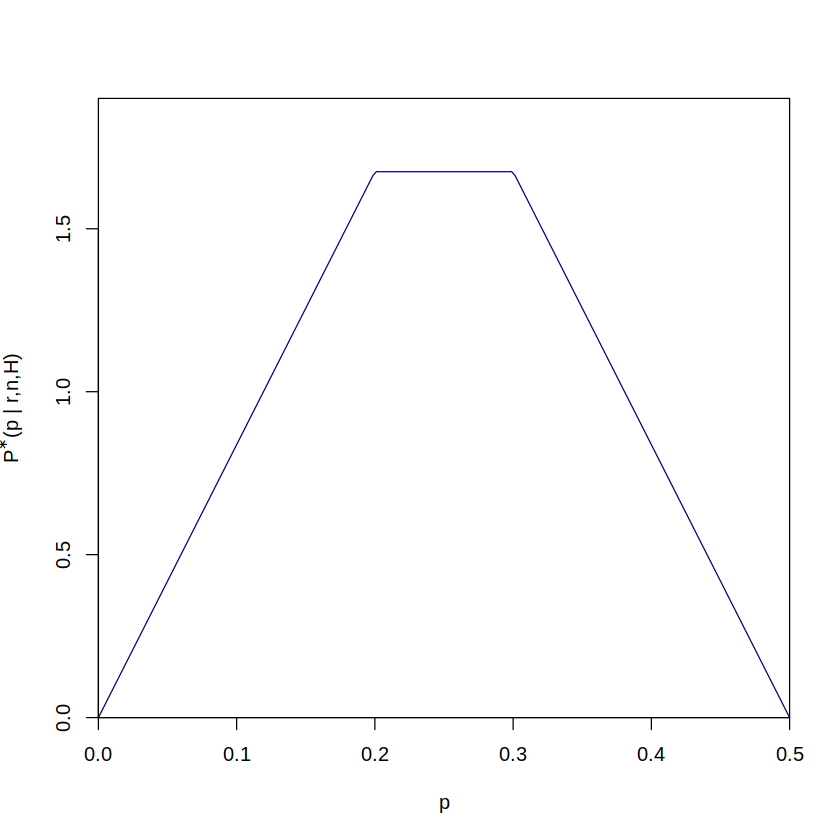

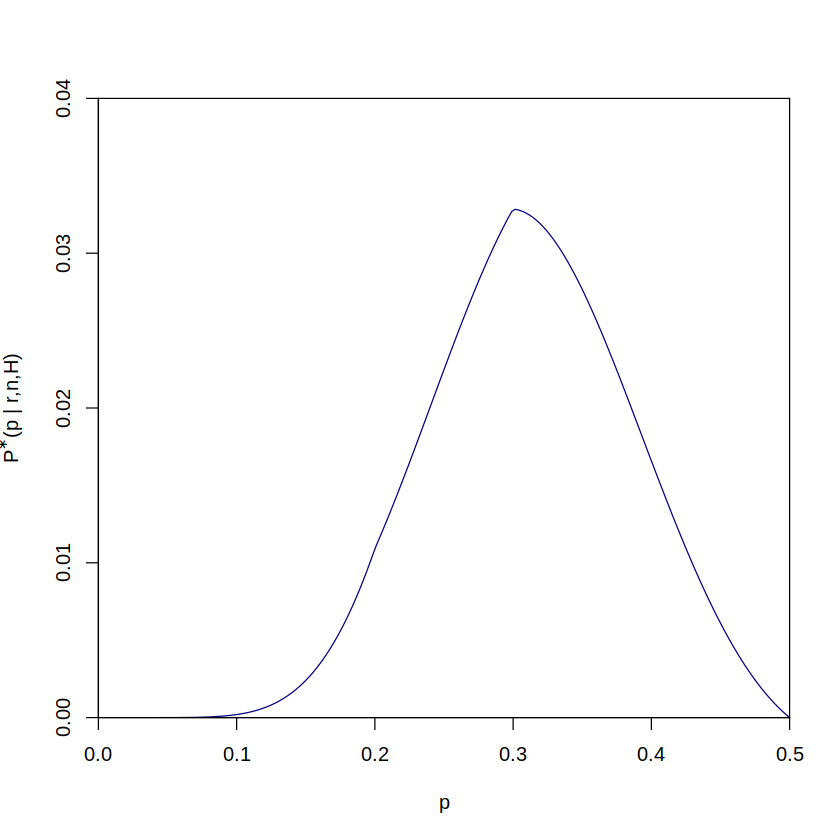

In [43]:
#step prior
n <- 20
r <- 7
p <- seq(0, 0.5, length.out = 200)

#define the step function
step <- function(x) {
    if (x <= 0.2) { 
        return(x)}
    else if (x >=0.2 & x<=0.3){ 
       return(0.2)}
    else if (x>0.3 & x<=0.5){
        return(0.5-x)}
    else if (x>0.5){
        return(0)}
}

prior.step <- sapply(p,step)
prior.step.norm <- prior.step /( delta.p*sum(prior.step)) #normalization

#plot prior
plot(p, prior.step.norm , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1,
ylim=c(0,1.9),
xlab="p",
ylab= expression(paste(P^symbol("*"), "(p | r,n,H)")))

#plot posterior
p.like <- dbinom (x=r, size=n, prob=p)  
post.step <- sapply(p,step)*p.like
plot(p, post.step , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1,
ylim=c(0,0.04),
xlab="p",
ylab= expression(paste(P^symbol("*"), "(p | r,n,H)")))

#mean, var
p.step.mean <- sum(p*prior.step.norm*delta.p) #compute firs moment
p.step.var <- sum(p*p*prior.step.norm*delta.p)-p.step.mean**2 #compute second moment


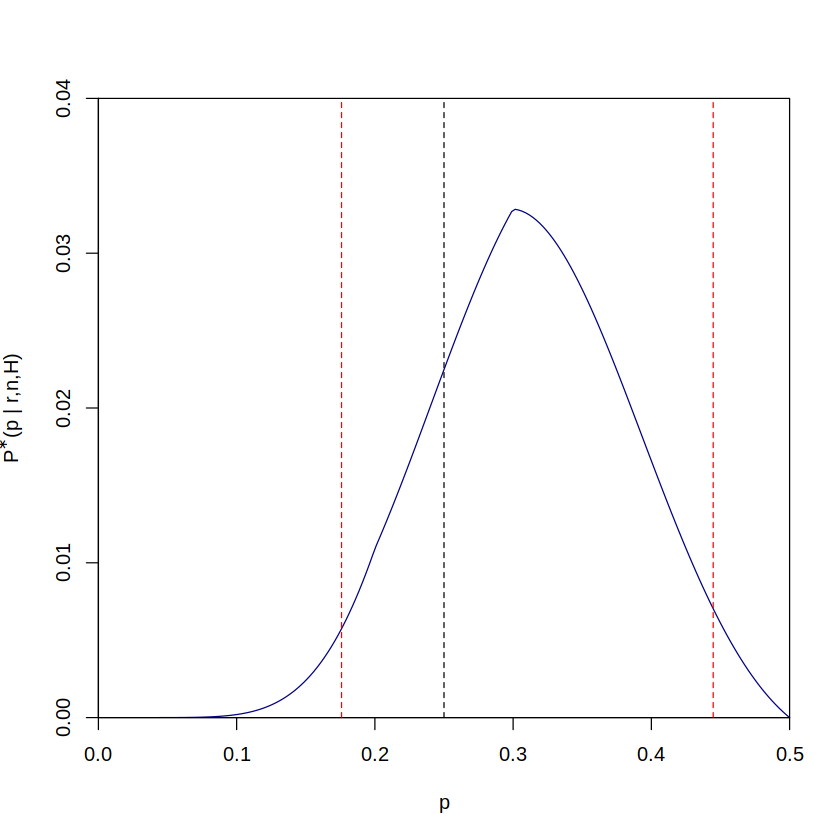

In [40]:
# Compute cumulative distribution function
cum.post <- cumsum(post.step )/sum(post.step )

# Find upper and lower bounds for 95% CI
lower <- min(p[cum.post >= 0.025])
upper <- max(p[cum.post <= 0.975])

# Plot posterior and CI
plot(p, post.step , xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd=1,
     ylim=c(0, 0.04),
     xlab="p",
     ylab=expression(paste(P^symbol("*"), "(p | r,n,H)")))
abline(v=p.step.mean, lty=2)
abline(v=lower, lty=2, col="red")
abline(v=upper, lty=2, col="red")

## Exercise 2
Giardia cysts[1] is a parassite that can contaminate food, water, and surfaces, and they can cause
giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person
swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects. <br>
A group of researchers, working for a Human Health Department, work for determining the quality
of stream water <br>
They take n = 116 samples of one-liter water from sites identified to have a heavy environmental
impact from birds and waterflow. <br>
• out of these samples, y = 17 samples contained Giard cystis <br>
• assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior
distribution for π: 
assuming a uniform prior distribution and
assuming a Beta (1, 4) prior <br>
• plot the posterior distribution and summerize the results computing the first two moments <br>
• find a normal approximation for the posterior g π y <br>
• compute a 95% credibility interval both for the original posterior and for the normal approximation,
giving the results in a summary table <br>
• add the limits on the plot of the posterior distributions <br>


FORMULA  ANALITICA PER VAR

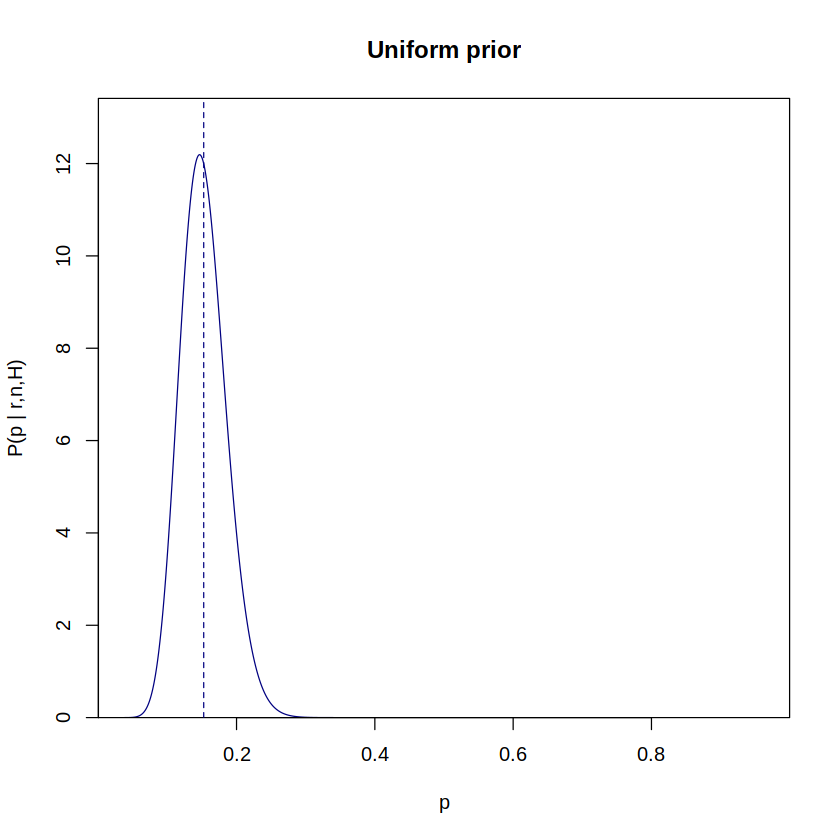

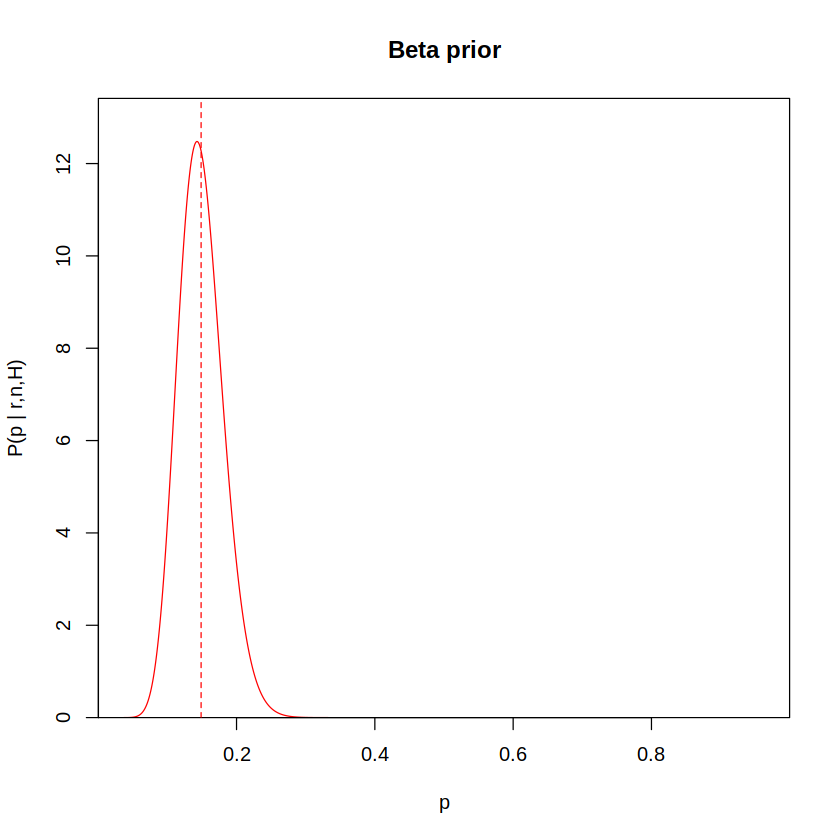

In [7]:
#find the posterior distribution for π: assuming a uniform prior distribution and assuming a Beta (1, 4) prior 
 
#uniform prior
n <- 116
r <- 17
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )
unif_post_star <- dbinom (x=r, size=n, prob=p)  # x is the number of successes
                                                                                            # size is the number of trials (20)
                                                                                           # prob : the probability of success of each trial (uniform)
unif_post_norm <- unif_post_star /( delta*sum(unif_post_star )) #normalization

unif_mean <- delta*sum(p*unif_post_norm) #compute firs moment
unif_var <- delta*sum(p*p*unif_post_norm)-unif_mean**2 #compute second moment

#Beta (1, 4) prior
alpha <- 1
beta <- 4
beta_post_norm <- dbeta(p, alpha+r , beta+n-r)

beta_mean <- (alpha+r) /( alpha + beta+n)
beta_var <- ((alpha+r) /( alpha + beta+n)**2)*(beta+n-r)/(alpha+beta+n+1)

#Plots
plot(p, unif_post_norm , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1,ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", main='Uniform prior', mar=c(3, 4, 4, 5), cex=1.2)
abline(v=unif_mean, lty=2, col='navy')

plot(p, beta_post_norm , xaxs='i',  yaxs='i', col='red', type='l', lty=1, lwd = 1,ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", main='Beta prior', mar=c(3, 4, 4, 5), cex=1.2)
abline(v=beta_mean, lty=2, col="red")

[1] 0.1465517

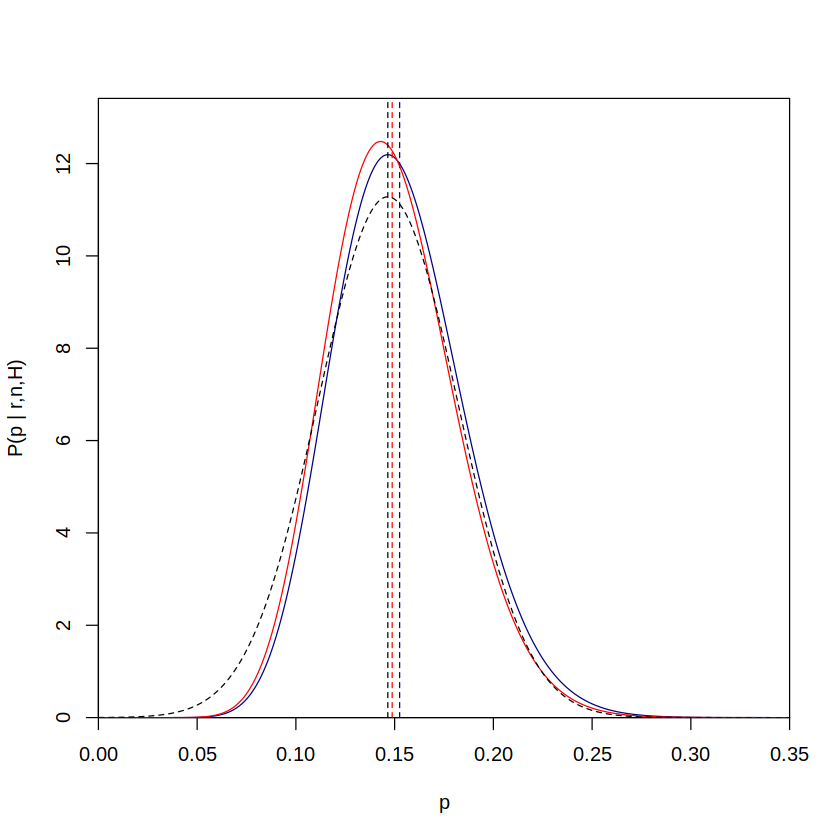

In [8]:
#Find a normal approximation for the posterior g(π | y)
mean <-r/n
sd <- sqrt(mean*(1-mean)/100)
gauss <-dnorm(p, mean, sd)

#Plots
plot(p, unif_post_norm , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1, xlim=c(0,0.35) ,ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", mar=c(3, 4, 4, 5), cex=1.2)
abline(v=unif_mean, lty=2, col='navy')

lines(p, beta_post_norm , xaxs='i',  yaxs='i', col='red', type='l', lty=1, lwd = 1,xlim=c(0,0.35), ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", mar=c(3, 4, 4, 5), cex=1.2)
abline(v=beta_mean, lty=2, col="red")

lines(p, gauss , xaxs='i',  yaxs='i', col='black', type='l', lty=2, lwd = 1, xlim=c(0,0.35), ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", mar=c(3, 4, 4, 5), cex=1.2)
abline(v=mean, lty=2, col="black")

In [218]:
#compute a 95% credibility interval both for the original posterior and for the normal approximation

#compute a 95% CI for the uniform
cum_unif <- cumsum(unif_post_norm)/sum(unif_post_norm) # Compute cumulative distribution function
lower_unif  <- min(p[cum_unif >= 0.025])# Find upper and lower bounds for 95% CI
upper_unif  <- max(p[cum_unif <= 0.975])

#compute a 95% CI for the beta
cum_beta <- cumsum(beta_post_norm)/sum(beta_post_norm) # Compute cumulative distribution function
lower_beta <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_beta <- max(p[cum_beta <= 0.975])

#compute a 95% CI for the gauss
cum_gauss <- cumsum(gauss)/sum(gauss) # Compute cumulative distribution function
lower_gauss <- min(p[cum_gauss >= 0.025])# Find upper and lower bounds for 95% CI
upper_gauss <- max(p[cum_gauss <= 0.975])

#summarize the result in a data frame
cred_int_unif <- c(lower_unif, upper_unif)
cred_int_beta <- c(lower_beta, upper_beta)
cred_int_gauss <- c(lower_gauss, upper_gauss)

# Create a data frame with the results
results <- data.frame(
  Method = c("Uniform Prior", "Beta Prior", "Gaussian Approximation"),
  Credibility_Interval = c(paste("[", round(cred_int_unif[1], 2), ", ", round(cred_int_unif[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_beta[1], 2), ", ", round(cred_int_beta[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_gauss[1], 2), ", ", round(cred_int_gauss[2], 2), "]", sep = "")
                          )
)

# Print the summary table
results

Method,Credibility_Interval
Uniform Prior,"[0.09, 0.22]"
Beta Prior,"[0.09, 0.22]"
Gaussian Approximation,"[0.08, 0.22]"


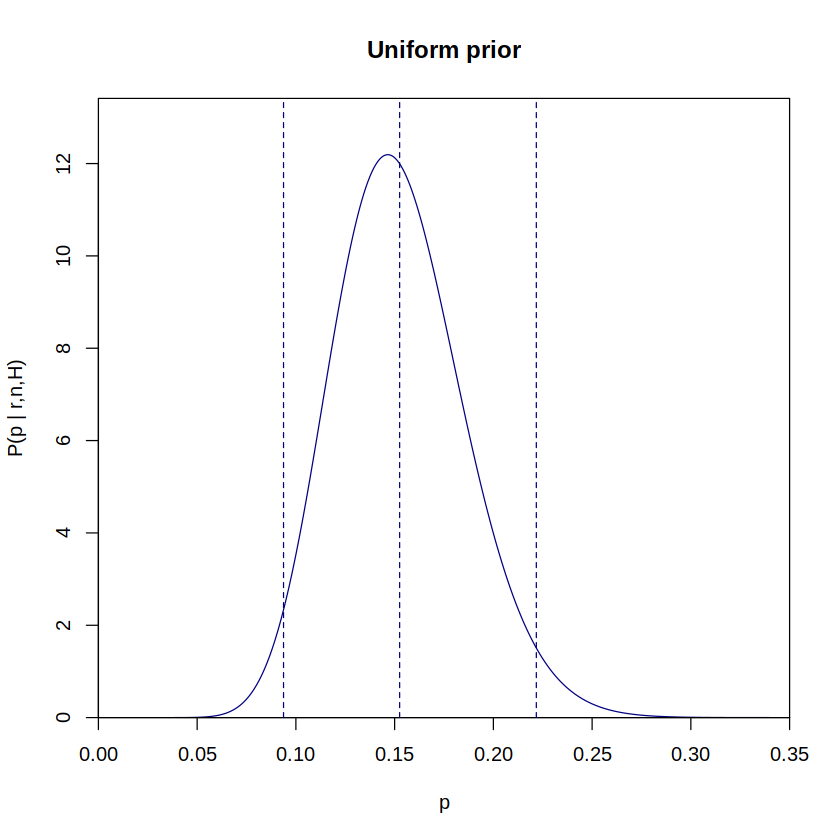

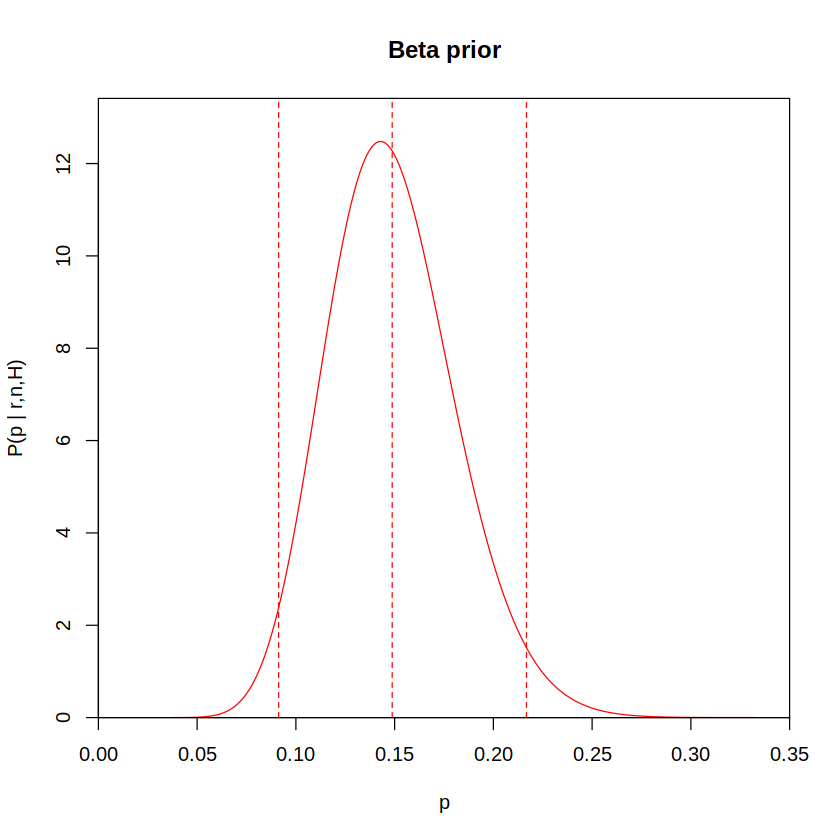

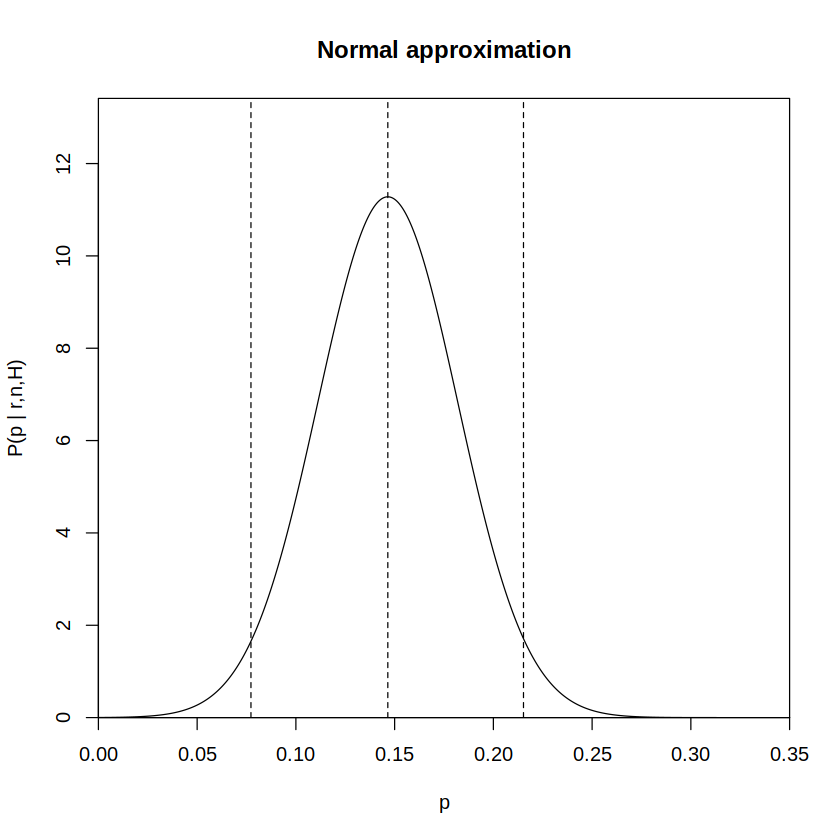

In [225]:
# add the limits on the plot of the posterior distributions 

plot(p, unif_post_norm , xaxs='i',  yaxs='i', col='navy', type='l', lty=1, lwd = 1, xlim=c(0,0.35) ,ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", main='Uniform prior', mar=c(3, 4, 4, 5), cex=1.2)
abline(v=unif_mean, lty=2, col='navy')
abline(v=cred_int_unif[1], lty=2, col="navy")
abline(v=cred_int_unif[2], lty=2, col="navy")

plot(p, beta_post_norm , xaxs='i',  yaxs='i', col='red', type='l', lty=1, lwd = 1,xlim=c(0,0.35), ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", main='Beta prior', mar=c(3, 4, 4, 5), cex=1.2)
abline(v=beta_mean, lty=2, col="red")
abline(v=cred_int_beta[1], lty=2, col="red")
abline(v=cred_int_beta[2], lty=2, col="red")

plot(p, gauss , xaxs='i',  yaxs='i', col='black', type='l', lty=1, lwd = 1, xlim=c(0,0.35), ylim=c(0,1.1*max(unif_post_norm)), xlab="p", ylab="P(p | r,n,H)", main='Normal approximation', mar=c(3, 4, 4, 5), cex=1.2)
abline(v=mean, lty=2, col="black")
abline(v=cred_int_gauss[1], lty=2, col="black")
abline(v=cred_int_gauss[2], lty=2, col="black")

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H <br>
a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set.<br>
b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability
distribution, give an estimate for a 95% credibility interval.<br>
c) Repeat the same analysis assuming a sequential analysis of the data 1 . Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).<br>
d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
(i.e. considering all the data as a whole) ?<br>

In [110]:
library(ggplot2)
library(patchwork)

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set.

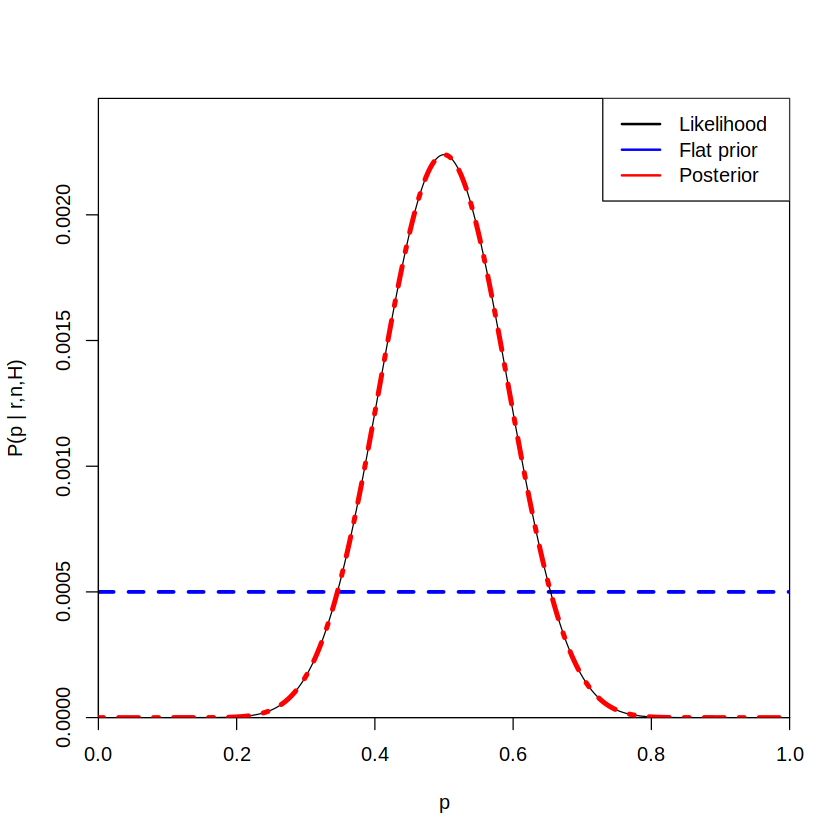

In [85]:
#Define the parameters
r <- 15 #successes
n <- 30 #trials

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

#uniform prior ( =beta(1,1) function)
U_prior <- dbeta(p, 1, 1)
U_prior_n <- U_prior/sum(U_prior)


#likelihood function for a binomial experiment with n trials and r successes is given by
likelihood <-  dbinom(x=r, size=n, prob=p)  
likelihood_n <- likelihood/sum(likelihood)

#posterior
U_posterior <- dbinom(x=r, size=n, prob=p)
U_posterior_n <- U_posterior/sum(U_posterior)

#plot
plot(p, U_prior_n , xaxs='i',  yaxs='i', col='blue', type='l', lty=2, lwd = 3, xlim=c(0,1), ylim=c(0,1.1*max(likelihood_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
lines(p, likelihood_n , xaxs='i',  yaxs='i', col='black', type='l', lty=1, lwd = 1, xlim=c(0,1), ylim=c(0,1.1*max(likelihood_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
lines(p, U_posterior_n , xaxs='i',  yaxs='i', col='red', type='l', lty=4, lwd = 4, xlim=c(0,1), ylim=c(0,1.1*max(likelihood_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
legend("topright", c("Likelihood", "Flat prior", "Posterior"), lwd=2, col=c("black", "blue", "red"))

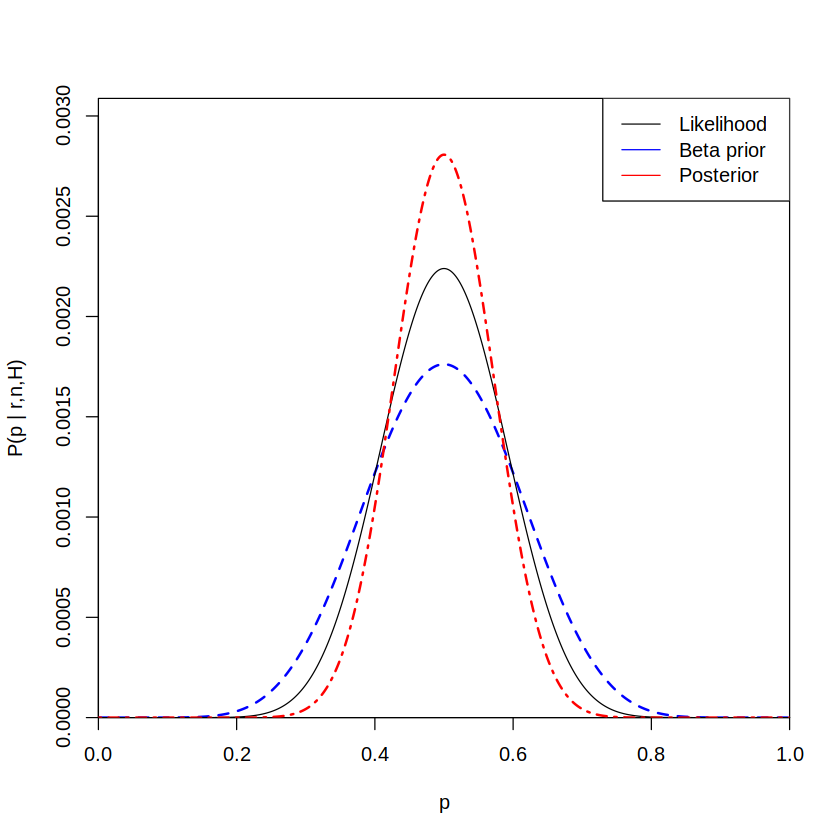

In [86]:
#Define the parameters
r <- 15  #successes
n <- 30 #trials

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

#Beta prior ( =beta(1,1) function)
alpha <- 10
beta <- 10
B_prior <- dbeta(p, alpha, beta)
B_prior_n <- B_prior/sum(B_prior)

#likelihood function for a binomial experiment with n trials and r successes is given by
likelihood <-  dbinom(x=r, size=n, prob=p)  
likelihood_n <- likelihood/sum(likelihood)

#posterior
B_posterior <- dbeta(p, alpha+r, beta+n-r)
B_posterior_n <- B_posterior/sum(B_posterior)

#plot
plot(p, B_prior_n , xaxs='i',  yaxs='i', col='blue', type='l', lty=2, lwd = 2, xlim=c(0,1), ylim=c(0,1.1*max(B_posterior_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
lines(p, likelihood_n , xaxs='i',  yaxs='i', col='black', type='l', lty=1, lwd = 1, xlim=c(0,1), ylim=c(0,1.1*max(B_posterior_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
lines(p, B_posterior_n , xaxs='i',  yaxs='i', col='red', type='l', lty=4, lwd = 2, xlim=c(0,1), ylim=c(0,1.1*max(B_posterior_n)), xlab="p", ylab="P(p | r,n,H)", main='', mar=c(3, 4, 4, 5), cex=1.2)
legend("topright", c("Likelihood", "Beta prior", "Posterior"), lwd=1, col=c("black", "blue", "red"))

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.
It has to be noticed that if we assume a flat prior distribution for the probability of success in a Binomial distribution, then the posterior distribution is proportional to the likelihood function. Therefore, the mode of the posterior distribution is simply the same as the maximum likelihood estimate (MLE) for the parameter of interest. <br>
In addition, as regard as the beta prior, the most probable value for the coin probability p is the mode of the posterior distribution, given by: <br>

$mode = \frac{(\alpha + r - 1)}{(\alpha + \beta + n - 2)}$


In [87]:
#The most probable value for the coin probability p is the mode
U_mode <- r/n
B_mode <- (alpha + r - 1)/( alpha + beta +n - 2)
cat('The most probable value for the coin probability p assuming a uniform prior is: ', U_mode, '\n')
cat('The most probable value for the coin probability p assuming a beta prior is: ',  B_mode)

#compute a 95% CI for the uniform distibution
cum_beta <- cumsum(B_posterior_n)/sum(B_posterior_n) # Compute cumulative distribution function
lower_unif <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_unif <- max(p[cum_beta <= 0.975])

#compute a 95% CI for the beta distribution
cum_beta <- cumsum(U_posterior_n)/sum(U_posterior_n) # Compute cumulative distribution function
lower_beta <- min(p[cum_beta >= 0.025])# Find upper and lower bounds for 95% CI
upper_beta <- max(p[cum_beta <= 0.975])

#summarize the result in a data frame
cred_int_unif <- c(lower_unif, upper_unif)
cred_int_beta <- c(lower_beta, upper_beta)

# Create a data frame with the results
results <- data.frame(
  Method = c("Uniform Prior", "Beta Prior"),
  Credibility_Interval = c(paste("[", round(cred_int_unif[1], 2), ", ", round(cred_int_unif[2], 2), "]", sep = ""),
                          paste("[", round(cred_int_beta[1], 2), ", ", round(cred_int_beta[2], 2), "]", sep = "")
                          )
)
results

The most probable value for the coin probability p assuming a uniform prior is:  0.5 
The most probable value for the coin probability p assuming a beta prior is:  0.5

Method,Credibility_Interval
Uniform Prior,"[0.36, 0.64]"
Beta Prior,"[0.33, 0.67]"


c) Repeat the same analysis assuming a sequential analysis of the data 1 . Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
DO ALSO FOR FLATTTTTT

In [197]:
#Define the parameters
trials <- c('T','T','T','T','T','H','T','T','H','H','T','T','H','H','H','T','H','T','H','T','H','H','T','H','T','H','T','H')
x <- numeric(length(trials)) #sequentially filled with 0=T or 1=H

# Define range of p values
n_sample <- 2000
delta <- 1/n_sample
p <- seq(from=1/(2*n_sample ), by=1/n_sample , length.out=n_sample )

# Define likelihood function
likelihood_function <- function(r, n, p) {
  likelihood <- dbinom(r, n, p)
  likelihood_n <- likelihood/sum(likelihood)
  return(likelihood_n)
}

# Define prior flat function
uniform_prior_function <- function(p) {
  uniform <- dbeta(p, 1, 1)
  uniform_n <- uniform/sum(uniform)
  return(uniform_n)
}

# Define posterior flat function
uniform_post_function <- function(p, r, n) {
  return(uniform_prior_function(p)*likelihood_function(r, n, p))
}

# Define prior beta function
beta_prior_function <- function(p, alpha, beta) {
  beta_dist <- dbeta(p, alpha, beta)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

# Define posterior beta function
beta_post_function <- function(p, alpha, beta, r, n) {
  beta_dist <- dbeta(p, alpha+r, beta+n-r)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}


#initialize x_i (trials in binary 0-1 form), r successes and n trials
x_i <- numeric(length(trials))
r <- 0
n <- 0

#define alpha and beta
alpha <- 10
beta <- 10

plots <- list() # Create an empty list to store the plots

# loop over trials
for (i in 1:length(trials)) {
  count <- ifelse(trials[i] == "H", 1, 0)
  r <- r + count
  n <- n + 1

  # Calculate posterior distribution and the most probable value
  posterior <- beta_post_function(p, alpha, beta, r, n)
  B_mode <- (alpha + r - 1)/( alpha + beta +n - 2)

  # Create ggplot object
  plot <- ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "blue") +
    geom_vline(xintercept = B_mode, color = "red", linetype = "dashed")+
    #geom_ribbon(aes(x = x, ymin =0, ymax = posterior), fill = "blue", alpha = 0.2) +   
    ylim(0, max(posterior) * 1.1) +
    annotate("text", x = B_mode+0.3, y = max(posterior), label = paste("Mode = ", round(B_mode,digits=2) ))+
    annotate("text", x = B_mode+0.3, y = max(posterior)-0.0002, label = paste("r =", r, ', n =', n))+
    xlab("p") +
    ylab("P(p | r, n, H)") +
    ggtitle(paste0("Trial ", i))
  
  # Add plot to list
  plots[[i]] <- plot
}

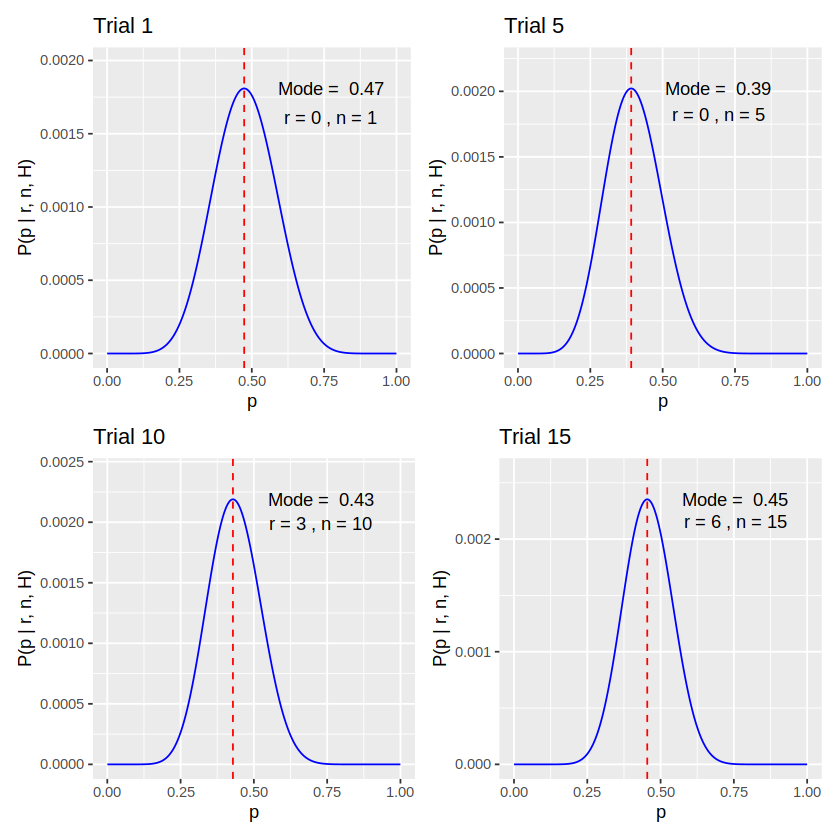

In [198]:
# create the combined plot by averaging two plots in the list
combined_plots <- (plots[[1]] + plots[[5]]) / (plots[[10]] + plots[[15]]) 
combined_plots

## Exercise 4 - Six Boxes Toy Model : inference
• write a program in R that performs a simulation of the process
1) after selecting a random box
2) make random sampling from the box
3) prints on the standard output the probability of selecting each box
4) plot the probability for each box as a function of the number of trial

Note that after each extraction, we update the probabilities of each hypothesis, using Bayes’
theorem: $P(H_j | I_n) = \frac{P(E^n|H_j I_{n-1}) P(H_j|I_{n-1})}{\Sigma P(E^n|H_j I_{n-1}) P(H_j|I_{n-1}) }$

In [214]:
# Create a vector of box labels
boxes <- c("H0", "H1", "H2", "H3", "H4", "H5")
n_boxes<- 0:5

# Set the number of trials and count variables
ntrials <- 500
count_black <- 0 
count_white <- 0

#select a random box
j <- sample(n_boxes, size = 1)
n_black <- 5-j
n_white <- j
cat("Box ", j, " choosen: ", n_black, " black and ", n_white, "white \n")

#sample from the chosen box with replacement
x  <- sample(c(0, 1), size = ntrials, replace = TRUE, prob =c(n_black/5,n_white/5))  #0=black, 1=white

#count numbers of black and white stones
counts <- table(x)
count_black <- ifelse(is.na(counts[1]), 0, counts[1])
count_white <- ifelse(is.na(counts[2]), 0, counts[2])
cat('Sampling outcome:  black-->', count_black*100/ntrials,' white -->', count_white*100/ntrials)

Box  4  choosen:  1  black and  4 white 
Sampling outcome:  black--> 20.6  white --> 79.4

Trial,E,H0,H1,H2,H3,H4,H5
0,0,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667
15,1,0.0000000,0.0000000,0.0050000,0.2010000,0.7940000,0.0000000
30,1,0.0000000,0.0000000,0.0040000,0.5470000,0.4490000,0.0000000
45,0,0.0000000,0.0000000,0.0000000,0.4510000,0.5480000,0.0000000
60,1,0.0000000,0.0000000,0.0000000,0.1730000,0.8270000,0.0000000
75,1,0.0000000,0.0000000,0.0000000,0.0500000,0.9500000,0.0000000
90,1,0.0000000,0.0000000,0.0000000,0.0050000,0.9950000,0.0000000
105,1,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
120,1,0.0000000,0.0000000,0.0000000,0.0010000,0.9990000,0.0000000
135,1,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000


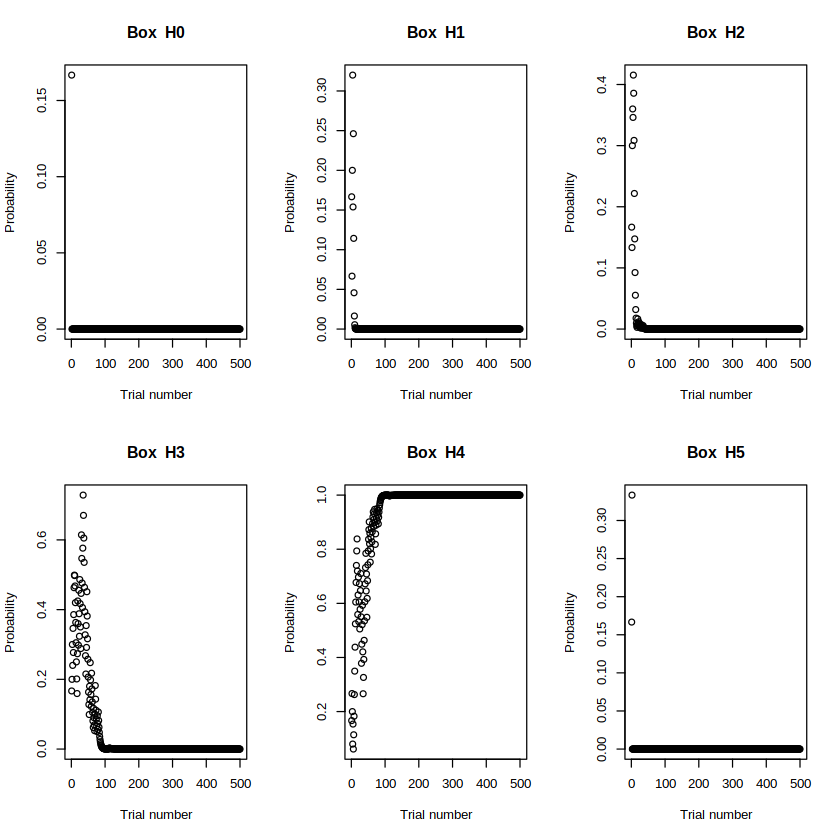

In [215]:
P <- matrix(0, nrow=ntrials, ncol=length(boxes))
P[1,] <- rep(1/6, length(boxes))  # Initialize P with uniform pdf in the first row

# Prints on the standard output the probability of selecting each box
P_final <- matrix(0, nrow=ntrials+1, ncol=length(boxes)+2)
P_final[1,3:8] <- rep(1/6, length(boxes))  # Initialize P with uniform pdf in the first row
colnames(P_final) <- c("Trial", "E", boxes)

#compute the probability of each hypotesis P(Hj|In)
for (i in 2:ntrials) {  #i=index of trials        
    E  <- x[i]  #select the sampled E for a specific trial number i (W<-1; B<-0)
    for (j in 1:length(boxes)) {  #j=index of box
        if (E==0) { P[i,j] <- ((5-j+1)/5) * P[i-1,j] }
        if (E==1) { P[i,j] <- ((j-1)/5) * P[i-1,j]}
    }
    P[i,] <- P[i,] / sum(P[i,])  # Normalize the row
    
    # Update the corresponding row in P_final
    P_final[i,1] <- i-1  # Trial number
    P_final[i,2] <- E  # Observed E value
    P_final[i,3:(length(boxes)+2)] <- round(P[i,], 3)  # Probability of each box
}

P_final_sub <- P_final[seq(1, 150, by = 15), ]
P_final_sub

# Plotting each column of the P matrix separately in function of the number of trials
par(mfrow=c(2,3))  # set the layout of the plots to 2 rows and 3 columns
for (j in 1:length(boxes)) {
  plot(1:ntrials, P[,j], type='p', xlab='Trial number', ylab='Probability', main=paste("Box ", boxes[j]))
}